In [144]:
from tictactoe import Board2D
import numpy as np

In [145]:
x = Board2D(board_size = 3)
print(x.board)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [146]:
x.place((0,0))
print(x.board)

[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [147]:
x.place((1,0))
print(x.board)

[[-1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]


In [148]:
from agent import RandomAgent
from sim import simulate

In [149]:
rand1 = RandomAgent(name = 'rand1')
rand2 = RandomAgent(name = 'rand2')

board = Board2D(board_size = 3)

In [150]:
results = simulate(board, rand1, rand2, num_sims = 100)
print(results)

{'draw': 37, 'rand1': 31, 'rand2': 32}


In [151]:
from agent import MiniMaxAgent

In [152]:
def simple_eval(node, player): #+100 reward if winner of a position, -100 reward if loser, 0 otherwise
    board = node.state
    if board.get_winner() == player:
        return 100
    elif board.get_winner() == -player:
        return -100
    return 0

In [153]:
mini = MiniMaxAgent(simple_eval, depth = 2)
results = simulate(board, mini, rand1, num_sims = 100)
print(results)

{'draw': 19, 'MiniMaxAgent': 79, 'rand1': 2}


In [154]:
def dist(loc1, loc2):
    return np.square(loc1 - loc2).sum()

In [58]:
def dist_from_center(loc, board):
    center = np.asarray([board.shape[0]//2, board.shape[1]//2])
    return dist(np.asarray(loc), center)

In [66]:
def center_dist_eval(node, player):
    board = node.state
    score = 0
    # i.e. gets the player we're evaluating the perspective of
    my_pieces = zip(*np.where(board.board == player))
    for loc in my_pieces:
        score -= dist_from_center(loc, board.board)
    return score + np.random.normal()

In [76]:
mini = MiniMaxAgent(center_dist_eval, depth = 2)
results = simulate(board, mini, rand1, num_sims = 100)
print(results)

{'draw': 19, 'MiniMaxAgent': 68, 'rand1': 13}


In [ ]:
def center_piece(node, player): #which player has the center piece
   

In [19]:
def edge_eval(node, player):
    board = node.state.board
    board_count = sum(board[:,0]) + sum(board[:,-1]) + sum(board[0]) + sum(board[-1])
    minus_corner = board_count - board[0,0] - board[0, -1] - board[-1, -1] - board[-1, 0]
    return (minus_corner) * player

In [70]:
mini = MiniMaxAgent(edge_eval, depth = 2)
results = simulate(board, mini, rand1, num_sims = 100)
print(results)

{'draw': 24, 'MiniMaxAgent': 62, 'rand1': 14}


In [84]:
def are_neighbors(loc1, loc2):
    dim = len(loc1)
    diff = np.asarray(loc1) - np.asarray(loc2)
    return np.square(diff).sum() <= np.ones(shape=(dim,)).sum()


In [91]:
def neighbors_eval(node, player):
    board = node.state
    score = 0
    other_player = -player
    
    if board.get_winner() == player:
        return 100
    elif board.get_winner() == other_player:
        return -100
    
    my_locs = list(zip(*np.where(board.board == player)))
    
    for loc in my_locs:
        for loc2 in my_locs:
            if are_neighbors(loc, loc2):
                score+=1
    return score

In [99]:
mini = MiniMaxAgent(neighbors_eval, depth = 2)
results = simulate(board, mini, rand1, num_sims = 100)
print(results)

{'draw': 8, 'MiniMaxAgent': 88, 'rand1': 4}


In [105]:
def two_in_a_row_eval(node, player):
    board = node.state
    score = 0
    # i.e. gets the player we're evaluating the perspective of
    my_pieces = zip(*np.where(board.board == player))
   
    if(board.get_winner() == player):
        score = 1000
    elif(board.get_winner() == -player):
        score = -1000
     
    for i in range(board.board.shape[0]):
        if sum(board.board[i]) == 2*player:
            score += 10
    for j in range(board.board.shape[1]):
        if sum(board.board[:,j]) == 2*player:
            score += 10
    if sum(np.diag(board.board)) == 2*player:
        score += 10
    if sum(np.diag(np.fliplr(board.board))) == 2*player:
        score += 10
   
    for i in range(board.board.shape[0]):
        if sum(board.board[i]) == -2*player:
            score -= 10
    for j in range(board.board.shape[1]):
        if sum(board.board[:,j]) == -2*player:
            score -= 10
    if sum(np.diag(board.board)) == -2*player:
        score -= 10
    if sum(np.diag(np.fliplr(board.board))) == -2*player:
        score -= 10
   
    return score + np.random.normal()
    # iterate through columns and check if they are 2 and an open color
    # iterate through rows and check if they are 2 and an open color
    # do this with diagonals as well


In [121]:
mini = MiniMaxAgent(two_in_a_row_eval, depth = 2)
results = simulate(board, mini, rand1, num_sims = 100)
print(results)

{'draw': 8, 'MiniMaxAgent': 92, 'rand1': 0}


In [127]:
def longest_chain(node, player):
    matrix = node.state.board

    if(node.state.get_winner() == player):
        score = 1000
    elif(node.state.get_winner() == -player):
        score = -1000
    
    max_1 = max(np.sum(matrix == player, axis = 0))
    max_2 = max(np.sum(matrix == player, axis = 1))
    max_diag1 = np.sum(np.diag(matrix == player))
    max_diag2 = np.sum(np.diag(np.fliplr(matrix == player)))
    
    return max(max_1, max_2, max_diag1, max_diag2)

In [128]:
mini = MiniMaxAgent(longest_chain, depth = 1)
results = simulate(board, mini, rand1, num_sims = 100)
print(results)

{'draw': 12, 'MiniMaxAgent': 64, 'rand1': 24}


The evauluation function edge_eval determines which player has more pieces on the edges of the board, and rewards the player with more edge pieces. 

simple_eval gives plus 100 if a player wins, -100 if a player loses, and 0 if it neither wins or loses.

center_dist_eval evaluates the distance of the players from the center, with higher reward for being further away from center. 

Another evaluation function is neighbors_eval, which rewards when the pieces that are neighbors for each location are also in a player's control, so it rewards clusters.

The evaluation function two_in_a_row_eval rewards the player with two pieces in a row, but subtracts when the opponent has two in a row. 



For lower depth, depth 1, out of 100 simulations:
A simple random agent will always be around draw: 33, rand1: 33, rand2: 33

Edge_eval is around draw: 15, MiniMaxAgent: 55, and rand: 30
Simple_eval is around 14, MiniMaxAgent: 78 and rand: 8
center_dist_eval is around draw: 22, MiniMaxAgent: 60, rand1: 18
neighbors_eval: draw: 12, MiniMaxAgent: 84, rand: 4
two_in_a_row_eval: draw: 14, MiniMaxAgent: 85, rand: 1

So far, the two_in_a_row_eval is the best evaluation function, as it has the highest minimax agent

For lower depth, depth 2, out of 100 simulations:
Edge_eval is around draw: 24, MiniMaxAgent: 62, rand: 14
Simple_eval is around draw: 19, MiniMaxAgent: 77, rand: 4
center_dist_eval is around draw: 16, MiniMaxAgent: 68, rand: 4
neighbors_eval: draw: 8, MiniMaxAgent: 88, rand: 4
two_in_a_row_eval: draw 8, MiniMaxAgent: 91, rand1: 1


For depth 2, neighbors_eval is still the best evaluation function as it has the highest minimax agent

Clearly, edge_eval and center_dist_eval are doing the worst for win percentages, with simple_eval, then neighbors_eval, then two_in_a_row_eval preforming the best.


In [129]:
eval_list = [edge_eval, simple_eval, center_dist_eval, neighbors_eval, two_in_a_row_eval]

In [118]:
from tqdm import tqdm
import pandas as pd

eval_win_df = pd.DataFrame(columns = ['Edge Eval', 'Simple Eval', 'Center Dist Eval', "Neighbor's Eval", 'Two in a Row Eval'])
eval_draw_df = pd.DataFrame(columns = ['Edge Eval', 'Simple Eval', 'Center Dist Eval', "Neighbor's Eval", 'Two in a Row Eval'])


for eval_func in tqdm(eval_list):
    agent_1 = MiniMaxAgent(eval_func, name = 'agent 1', depth = 2)
    
    list_tmp_win = []
    list_tmp_draw = []
    
    for eval_func_2 in tqdm(eval_list):
        agent_2 = MiniMaxAgent(eval_func_2, name = 'agent 2', depth = 2)
        results = simulate(board, agent_1, agent_2, num_sims = 50)
        list_tmp_win.append(results['agent 1'])
        list_tmp_draw.append(results['draw'])
        
    eval_win_df.loc[len(eval_win_df)] = list_tmp_win
    eval_draw_df.loc[len(eval_draw_df)] = list_tmp_draw
    

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:51<00:00, 70.28s/it]


In [133]:
res_list = []

for n in tqdm(range(3,10)):
    board = Board2D(board_size = n)
    agent_center = MiniMaxAgent(center_dist_eval, name = 'center dist', depth = 1)
    agent_chain = MiniMaxAgent(longest_chain, name = 'longest chain', depth = 1)
    
    results = simulate(board, agent_center, agent_chain, num_sims = 50)
    
    res_list.append(results)

 57%|████████████████████████████████████████████████                                    | 4/7 [03:37<02:43, 54.36s/it]


KeyboardInterrupt: 

In [137]:
def plot_agent_results(results, agent1, agent2, title, x, xlabel='', ylabel='', xticks=None):
    sim_values = [list(x.values()) for x in results]
    draws = [x[0]/sum(x) for x in sim_values] # get percentage
    a1_winrate = [x[1]/sum(x) for x in sim_values]
    a2_winrate = [x[2]/sum(x) for x in sim_values]
    
    res_df = pd.DataFrame({'draws':draws, f'{agent1.name} agent wins':a1_winrate, f'{agent2.name} agent wins':a2_winrate})
    res_df.index = x
    
    res_df.plot(kind='bar', stacked=False, width=0.5, title=title, xlabel=xlabel, ylabel=ylabel)

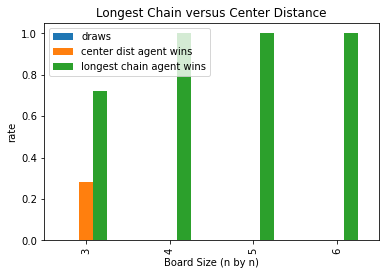

In [138]:
agent_center = MiniMaxAgent(center_dist_eval, name = 'center dist', depth = 1)
agent_chain = MiniMaxAgent(longest_chain, name = 'longest chain', depth = 1)
plot_agent_results(res_list, agent_center, agent_chain, x = [3,4,5,6], xlabel='Board Size (n by n)', ylabel='rate', title='Longest Chain versus Center Distance')

In [140]:
res_list2 = []

for n in tqdm([3,4,5,6]):
    board = Board2D(board_size = n)
    agent_center = MiniMaxAgent(center_dist_eval, name = 'center dist', depth = 1)
    agent_chain = MiniMaxAgent(two_in_a_row_eval, name = 'two in a row', depth = 1)
    
    results = simulate(board, agent_center, agent_chain, num_sims = 50)
    
    res_list2.append(results)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:30<00:00, 37.62s/it]


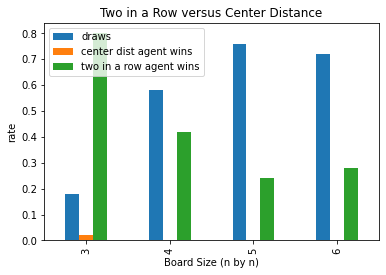

In [141]:
agent_center = MiniMaxAgent(center_dist_eval, name = 'center dist', depth = 1)
agent_chain = MiniMaxAgent(two_in_a_row_eval, name = 'two in a row', depth = 1)
plot_agent_results(res_list2, agent_center, agent_chain, x = [3,4,5,6], xlabel='Board Size (n by n)', ylabel='rate', title='Two in a Row versus Center Distance')

Text(0.5, 1.0, 'Win Percentage of eval on Y vs X')

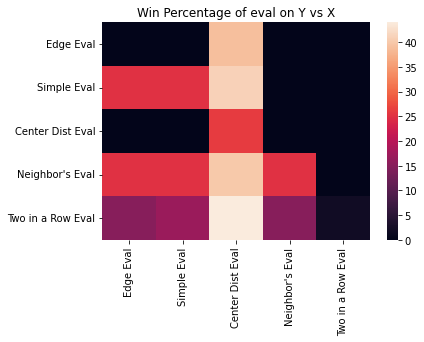

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

eval_win_df.index = eval_win_df.columns

sns.heatmap(eval_win_df)
plt.title("Win Percentage of eval on Y vs X")

Text(0.5, 1.0, 'Draw Percentage of eval on Y vs X')

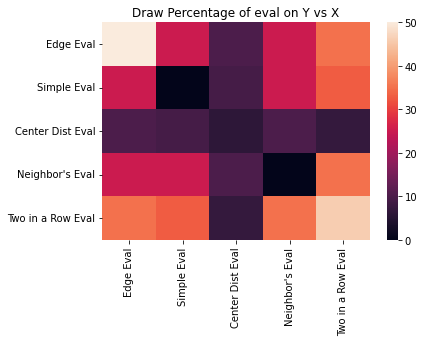

In [143]:
eval_draw_df.index = eval_draw_df.columns

sns.heatmap(np.maximum(eval_draw_df.values, eval_draw_df.values.T), xticklabels = eval_draw_df.columns, yticklabels = eval_draw_df.columns)
plt.title("Draw Percentage of eval on Y vs X")